In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import random
import time
import math
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# def findFiles(path): return glob.glob(path)
# print(findFiles('UScomments.csv'))
df=pd.read_csv('UScomments.csv', sep=',',header=None,encoding='ISO-8859–1',dtype={'video_id':str, 'comment_text':str, 'likes':int, 'replies':int})
#my_data = np.genfromtxt('UScomments.csv', delimiter=',')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
from sklearn.model_selection import train_test_split

In [3]:
a = df.to_numpy()

In [4]:
np.random.seed(0)
a = a[:,:3]

In [6]:
X = a[:,1]
Y= a[:,2]

In [87]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.99)

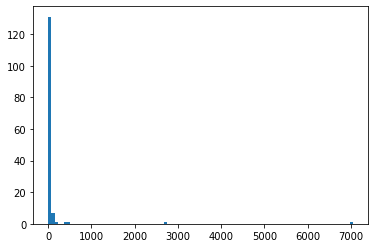

In [42]:
#type(Ytr)
display = Ytr[Ytr==Ytr.astype(int)]
display = display[display>4]
plt.hist(display,bins=100)
plt.show()

In [88]:
mask = Ytr==Ytr.astype(int)
Ytr = Ytr[mask]
Xtr = Xtr[mask]

In [89]:
mask = Xtr==Xtr.astype(str)
Ytr = Ytr[mask]
Xtr = Xtr[mask]

In [90]:
text = Xtr
# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))

# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))

# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}
# Finding the length of the longest string in our data
maxlen = len(max(text, key=len))